In [4]:
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 1000

df = pd.read_csv('/content/Train_Data.csv',index_col=False)
df.head()

,id,Text,oh_label
0,5.75E+17,@urgedharry @nyazpolitics @greenlinerzjm Then why doesn't she know that her prophet called women stupid and corrupt.,0
1,5.62E+17,"RT @RudawEnglish: Dozens of vehicles belonging to #ISIS were destroyed by coalition airstrikes from the #Syrian border, en route #Rumadi.",0
2,5.75E+17,@biebervalue @greenlinerzjm Here is the Quran telling men they can beat their wives and that men are superior. http://t.co/8xldNwbvZx,1
3,5.55E+17,@Ceff00 @JosephIsVegan @SumbelinaZ @IronmanL1 @Hatewatch There are over 100 Islamic terrorist groups. No other religion is close.,1
4,5.76E+17,I would literally kill someone for Jac and Shaz's pancakes right now #MKR,0


In [5]:
df.drop('id',axis=1,inplace = True)

In [6]:
df.head()

,Text,oh_label
0,@urgedharry @nyazpolitics @greenlinerzjm Then why doesn't she know that her prophet called women stupid and corrupt.,0
1,"RT @RudawEnglish: Dozens of vehicles belonging to #ISIS were destroyed by coalition airstrikes from the #Syrian border, en route #Rumadi.",0
2,@biebervalue @greenlinerzjm Here is the Quran telling men they can beat their wives and that men are superior. http://t.co/8xldNwbvZx,1
3,@Ceff00 @JosephIsVegan @SumbelinaZ @IronmanL1 @Hatewatch There are over 100 Islamic terrorist groups. No other religion is close.,1
4,I would literally kill someone for Jac and Shaz's pancakes right now #MKR,0


In [7]:
df.shape

(15275, 2)

In [8]:
df.columns

Index(['Text', 'oh_label'], dtype='object')

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11794 entries, 0 to 11793
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      11794 non-null  object
 1   oh_label  11794 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 184.4+ KB


In [248]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [253]:
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will', 'wa', 'e', 'like'])
stemmer = SnowballStemmer('english')

def remove_tags(text):
  text = re.sub(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)", '', text)
  text = " ".join([stemmer.stem(word) for word in text.split()])
  remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
  text = remove_punc.sub('', text)
    
    # Removing stopwords
  text = " ".join([word for word in text.split() if word not in STOPWORDS])
  text = text.strip()
  return text
 

In [254]:
lst = []
for i in range(0,df.shape[0]):
  print('for {}'.format(i),remove_tags(df['Text'][i]))
  lst.append(remove_tags(df['Text'][i]))
  

Streaming output truncated to the last 5000 lines.
for 6794 yamin
for 6795 reason whi kati nikki cook main name
for 6796 yes let tri fool peopl believ lie religion peace
for 6797 dont think misogynist figur say wont want sex onli bonus shaving
for 6798 gabroni sexist cannot pictur thor anyth els charact
for 6799 st
for 6800 anni loyd look rissole
for 6801 couldnt ever develop last romant feel anyon prefer dampd 4th edit 35
for 6802 ashleylynch organ tri stop antiharass non profit almost actual support harass…
for 6803 iv eaten iv seen guy old dago order everyon around
for 6804 beyond notic russian control make leav ukr control make return
for 6805 dont sum total unconsci bias sexist dont femal singer haha
for 6806 shia militia terrorist onli slight better isis look shia militia yemen
for 6807 go
for 6808 grumpyvancouver issu femal host sport broadcast variat tone voice
for 6809 bad thing huge chang sometimesfoss dev fulltim devop whatev
for 6810 
for 6811 jgray0711 king joffrey
for 681

In [255]:
dfnew = pd.DataFrame(lst,columns=['Cleandata'])

In [256]:
dfnew['types']= df['oh_label']

In [257]:
dfnew.head()

,Cleandata,types
0,whi doesnt know prophet call women stupid corrupt,0
1,rudawenglish dozen vehicl belong destroy coalit airstrik border en rout,0
2,quran tell men beat wive men superior,1
3,100 islam terrorist groups religion close,1
4,would liter kill someon jac shaz pancak right,0


In [258]:
dfnew['types'].value_counts()

0    8050
1    3744
Name: types, dtype: int64

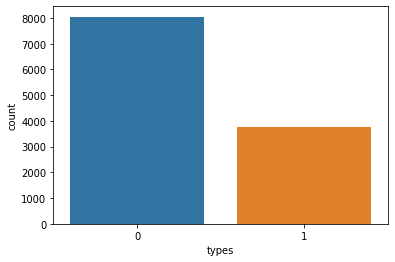

In [259]:
import seaborn as sns

sns.countplot(data=dfnew,x='types')

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline

In [261]:
xtrain,xtest,ytrain,ytest=train_test_split(dfnew.Cleandata,dfnew.types,test_size=0.25,random_state=2529)

In [262]:
xtrain.shape

(8845,)

In [263]:
xtrain.head()

1232    oapi alreadi work sever tech compani develop engin solut social problems tech advoc user
4828                                                           jew khybar live khybar far medina
6218                                       gg took tb statement mean hide harass anoth subreddit
4904                               part reason activ use much becaus weight factor still decided
8748             paraketa 800 milit kill area around mosul februari kurdish forc coalit airstrik
Name: Cleandata, dtype: object

In [264]:
v = CountVectorizer() 
X_train_count = v.fit_transform(xtrain.values) 
X_train_count.toarray()[:2] 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [265]:
x_test=v.transform(xtest)

In [291]:
from sklearn.metrics import classification_report,plot_confusion_matrix
from xgboost import XGBClassifier

In [290]:
from sklearn.metrics import accuracy_score

{'approx', 'auto', 'exact', 'gpu_exact', 'gpu_hist', 'hist'}

In [293]:
clf = XGBClassifier(tree_method='approx',
                    max_depth=10,
                    subsample=0.8,
                    min_child_weight=1,
                    colsample_bytree=0.8,
                    learning_rate=0.02,
                    n_estimators=800,
                    scale_pos_weight=8050/3744)
clf.fit(X_train_count,ytrain)
ypred=clf.predict(x_test)
y_train_pred=clf.predict(X_train_count)
print('train accuracy: ',accuracy_score(ytrain,y_train_pred))
print('testing accuracy: ',accuracy_score(ytest,ypred))

train accuracy:  0.8477105709440361
testing accuracy:  0.821634452356731


In [287]:
print('train accuracy: ',accuracy_score(ytrain,y_train_pred))
print('testing accuracy: ',accuracy_score(ytest,ypred))

train accuracy:  0.8411531938948559
testing accuracy:  0.8206171583587657


In [286]:
import plotly.express as px

for cyber_type in dfnew.types.unique():
    
    top50_word = dfnew.Cleandata[dfnew.types==cyber_type].str.split(expand=True).stack().value_counts()[:15]
    
    fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
    fig.update_traces(marker_color='red')
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    fig.update_layout(title=f"Top 15 words for {cyber_type}",
                     template='simple_white',
                     hovermode='x unified')
    fig.show()

In [294]:
pipe = Pipeline([('v',CountVectorizer()),('clf' ,XGBClassifier(tree_method='approx',
                    max_depth=10,
                    subsample=0.8,
                    min_child_weight=1,
                    colsample_bytree=0.8,
                    learning_rate=0.02,
                    n_estimators=800,
                    scale_pos_weight=8050/3744))])
x=dfnew['Cleandata']
y=dfnew['types']
pipe.fit(x,y)

Pipeline(steps=[('v', CountVectorizer()),
                ('clf',
                 XGBClassifier(colsample_bytree=0.8, learning_rate=0.02,
                               max_depth=10, n_estimators=800,
                               scale_pos_weight=2.1501068376068377,
                               subsample=0.8, tree_method='approx'))])

In [297]:
pipe.predict(["@abc Man you don't have any facial hair. You look like a fucking 9 year old school boy! #clown #idiot"])

array([1])

In [183]:
dfnew[dfnew['types']==1]

,Cleandata,types
2,Here is the Quran telling men they can beat their wives and that men are superior.,1
3,There are over 100 Islamic terrorist groups. No other religion is close.,1
8,"The elderly Chinese gentleman hasn't heard of bubble &amp; squeak before, and steps away from the insane red head squeaking at him.",1
13,"No, I you explain why telling a person you are arguing w/ they cannot get laid is wrong.",1
14,_aly And maybe you are to stupid to see that the Muslim terrorist in Palestine murder more civilians that Israel.,1
...,...,...
11775,MALE OPINION ALERT! I swear im not sexist but WNBA..........I'll pass lol,1
11777,"Islam considers women as one big sex organ, so no part of her can be exposed. This is a reflection of the perversion of their prophet.",1
11781,", but, a 'ill be in 5 minutes is the same length of time as a 'ill be in 5 minutes'..",1
11789,thehill: Did TIME magazine give Hillary Clinton horns?,1


In [146]:
test_data = pd.read_csv("/content/Test_Data.csv",index_col=False)
test_data.head()

,id,Text
0,5.680000e+17,I can't explain this. http://t.co/GY1rcVZgbO
1,5.760000e+17,“@WomensWeeklyMag: UPDATE: @healthgovau launch investigation into MKR chef Pete Evans Paleo cookbook for kids http://t.co/TBr3xdQDK7” #mkr
2,5.760000e+17,It would be really funny if they kicked out the 2 lowest teams as a surprise wouldn't it! 😉 #mkr #mkr2015
3,5.720000e+17,RT @GrumpyPigeon: I'm thinking #MKR will go past Christmas Eve and get into 2016 at this rate!
4,5.720000e+17,#MKR praying these two bloody bimbos will leave the comp in the next round


In [147]:
test_data.drop('id',axis=1,inplace=True)

In [312]:
test_data.iloc[18]

Text    RT @0rwellian: Labor &amp; Islam working together RT @phlim1942: #pmlive Rotherham abuse victim: 'I was raped once a week, every week'  http://…
Name: 18, dtype: object

In [306]:
from google.colab import files
pred = pipe.predict(test_data['Text'])
result = pd.DataFrame(pred,columns=['prediction'])
result

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
5051,0
5052,0
5053,0
5054,1


In [307]:
result.to_csv('prediction.csv')
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>